# ML RANKING

In [179]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from nltk.corpus import stopwords


# Expand the dataset

# Load the LOINC dataset

# Find Relevant Terms in our Dataset


In [180]:
    

stop_words = set(stopwords.words('english'))


data=pd.read_csv('Loinc.csv')




## Apply data lower case
data['name_lower']=data['LONG_COMMON_NAME'].str.lower()
    



queries=['glucose in blood','bilirubin in plasma','White blood cells count','insulin in blood','cancer ag 125 pleural fluid','mra thigh vessels contrast','deoxycortisol in serum']

## Here we pull relevant rows which match non-stop words and mix in an equal amount of random terms
def filterDF(dataset: pd.DataFrame,a_query: str):
    query=a_query.lower()
    print(query)
    dataset['query_score']=0
    dataset['term_score']=0
    terms=str.split(str.lower(a_query),' ')
    
    return_df=pd.DataFrame()
    for a_term in terms:
        if a_term not in stop_words:
            dataset['term_score']=dataset['name_lower'].str.contains(a_term).astype(int)*len(a_term)
            dataset['query_score']=dataset['query_score']+dataset['term_score']

    ## Only get rec
    return_df=return_df.append(dataset[dataset['query_score']>6],ignore_index=True)

    ## Get len of return_df
    df_len=len(return_df)

    ## Sample same amount of rows to "balance" the return dataset"
    return_df=return_df.append(dataset.sample(n=df_len))

    ## Reset indx
    return_df=return_df.reset_index(drop=True)

    return_df_cols=['LOINC_NUM','LONG_COMMON_NAME','COMPONENT','SYSTEM','PROPERTY','query_score']
    
    return_df=return_df[return_df_cols]

    return_df.columns=['loinc_num','long_common_name','component','system','property','query_score']
    return return_df

data_glucose=filterDF(data,queries[0])

data_bilirubin=filterDF(data,queries[1])

data_wbcc=filterDF(data,queries[2])

data_insulin=filterDF(data,queries[3])

data_cancer=filterDF(data,queries[4])

data_mra=filterDF(data,queries[5])

data_cortisol=filterDF(data,queries[6])



C:\Users\melli\AppData\Local\Temp\ipykernel_3644\1505717211.py:4: DtypeWarning: Columns (8,15,22,35,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('Loinc.csv')


glucose in blood
bilirubin in plasma


C:\Users\melli\AppData\Local\Temp\ipykernel_3644\1505717211.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return_df=return_df.append(dataset[dataset['query_score']>6],ignore_index=True)
C:\Users\melli\AppData\Local\Temp\ipykernel_3644\1505717211.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return_df=return_df.append(dataset.sample(n=df_len))
C:\Users\melli\AppData\Local\Temp\ipykernel_3644\1505717211.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return_df=return_df.append(dataset[dataset['query_score']>6],ignore_index=True)
C:\Users\melli\AppData\Local\Temp\ipykernel_3644\1505717211.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

white blood cells count
insulin in blood


C:\Users\melli\AppData\Local\Temp\ipykernel_3644\1505717211.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return_df=return_df.append(dataset[dataset['query_score']>6],ignore_index=True)
C:\Users\melli\AppData\Local\Temp\ipykernel_3644\1505717211.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return_df=return_df.append(dataset.sample(n=df_len))
C:\Users\melli\AppData\Local\Temp\ipykernel_3644\1505717211.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return_df=return_df.append(dataset[dataset['query_score']>6],ignore_index=True)
C:\Users\melli\AppData\Local\Temp\ipykernel_3644\1505717211.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

cancer ag 125 pleural fluid


C:\Users\melli\AppData\Local\Temp\ipykernel_3644\1505717211.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return_df=return_df.append(dataset[dataset['query_score']>6],ignore_index=True)
C:\Users\melli\AppData\Local\Temp\ipykernel_3644\1505717211.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return_df=return_df.append(dataset.sample(n=df_len))
C:\Users\melli\AppData\Local\Temp\ipykernel_3644\1505717211.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return_df=return_df.append(dataset[dataset['query_score']>6],ignore_index=True)
C:\Users\melli\AppData\Local\Temp\ipykernel_3644\1505717211.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

mra thigh vessels contrast
deoxycortisol in serum


C:\Users\melli\AppData\Local\Temp\ipykernel_3644\1505717211.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return_df=return_df.append(dataset[dataset['query_score']>6],ignore_index=True)
C:\Users\melli\AppData\Local\Temp\ipykernel_3644\1505717211.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return_df=return_df.append(dataset.sample(n=df_len))


# Merge datasets

In [181]:
datasets=[data_glucose,data_bilirubin,data_wbcc,data_insulin,data_cancer,data_mra,data_cortisol]

In [182]:
# Calculates the reelevance column automatically
def calculate_relevance(df, query):
    # Preprocess the query and cleaning text
    query_clean = re.sub(r'\bin\b', '', query).strip()
    keywords = query_clean.split()

    df['relevance'] = 0

    # Check every row and asign 1 if some key word is present on 'long_common_name'
    df['relevance'] = df['long_common_name'].apply(lambda text: 1 if any(word.lower() in text.lower() for word in keywords) else 0)

    return df

In [183]:
#Calculate relevance for all the queries

datasets=[data_glucose,data_bilirubin,data_wbcc,data_insulin,data_cancer,data_mra,data_cortisol]



df_ml_glucose = calculate_relevance(datasets[0],queries[0])
df_ml_bilirubin = calculate_relevance(datasets[1],queries[1])
df_ml_white_blood = calculate_relevance(datasets[2],queries[2])
df_ml_insulin = calculate_relevance(datasets[3],queries[3])
df_ml_cancer = calculate_relevance(datasets[4],queries[4])
df_ml_mra=calculate_relevance(datasets[5],queries[5])
df_ml_cortisol=calculate_relevance(datasets[6],queries[6])



# Similarity

In [184]:
# Calculate similarity based on cosine similarity
def calculate_ranking_idf(df, query, output_filename=None):
    # Preprocessing query
    query_clean = re.sub(r'\bin\b', '', query).strip()
    vocabulary = query_clean.split()
    combined_text = [' '.join(row) for row in zip(df['long_common_name'], df['component'])]

    # TF-IDF Vectorization
    vectorizer = TfidfVectorizer(vocabulary=vocabulary)
    X = vectorizer.fit_transform(combined_text)
    query_vector = vectorizer.transform([query_clean])

    # Calculating similarity
    similarity_scores = cosine_similarity(X, query_vector).flatten()

    # Add score to the dataframe
    df['score'] = similarity_scores
    df['score_label']=df['score'].apply(lambda x: 1 if x>=.5 else 0)

    df = df.sort_values(by='score', ascending=False)

    if output_filename:
        df.to_csv(output_filename, index=False)

    return df

In [185]:
#Calculate similarities and rank them
df_idf_glucose = calculate_ranking_idf(df_ml_glucose, queries[0], "ranking_glucose_idf.csv")
df_idf_bilirubin = calculate_ranking_idf(df_ml_bilirubin, queries[1], "ranking_bilirubin_idf.csv")
df_idf_white_blood = calculate_ranking_idf(df_ml_white_blood, queries[2], "ranking_white_cells_idf.csv")
df_idf_insulin = calculate_ranking_idf(df_ml_insulin, queries[3], "ranking_insulin_idf.csv")
df_idf_cancer = calculate_ranking_idf(df_ml_cancer, queries[4], "ranking_cancer_idf.csv")
df_idf_mra = calculate_ranking_idf(df_ml_mra, queries[5], "ranking_mra_idf.csv")
df_idf_cortisol = calculate_ranking_idf(df_ml_cortisol, queries[6], "ranking_cortisol_idf.csv")

c:\Users\melli\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:1364: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


In [186]:
#Evaluate performance and display of results
def evaluation_with_plots_idf(df, query, threshold):

    ranked_df = calculate_ranking_idf(df, query)

    y_pred = (ranked_df['score'] >= threshold).astype(int)
    cm = confusion_matrix(ranked_df['relevance'], y_pred)
    precision = precision_score(ranked_df['relevance'], y_pred)
    recall = recall_score(ranked_df['relevance'], y_pred)

    # -- CONFUSION MATRIX --
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Irrelevant', 'Relevant'], yticklabels=['Irrelevante', 'Relevant'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {query}")
    plt.show()

    # -- PRECISION AND RECALL --
    metrics = ['Precision', 'Recall']
    values = [precision, recall]

    plt.figure(figsize=(6,4))
    sns.barplot(x=metrics, y=values, palette='coolwarm')
    plt.ylim(0, 1)
    plt.ylabel("Score")
    plt.title(f"Precision y Recall - {query}")
    plt.show()

    print(f"Results for the query: {query}\n")
    print("Confusion Matrix:")
    print(cm)
    print("\nPrecision:", precision)
    print("Recall:", recall)

In [187]:
# # Evaluation for all queries
# evaluation_with_plots_idf(df_ml_glucose, 'glucose in blood', 0.3)
# evaluation_with_plots_idf(df_ml_bilirubin, 'bilirubin in plasma', 0.3)
# evaluation_with_plots_idf(df_ml_white_blood, 'white blood cells count', 0.25)
# evaluation_with_plots_idf(df_ml_insulin, 'insulin in blood', 0.3)
# evaluation_with_plots_idf(df_ml_cancer, 'mra thigh vessels contrast', 0.3)
# evaluation_with_plots_idf(df_ml_mra, 'cancer ag 125 plerual fluid', 0.3)
# evaluation_with_plots_idf(df_ml_mra,'21-deoxycortisol in serum',.3)

    

# Logistic regression

In [188]:


#Preprocessing for the model
dfs = {
    "glucose": df_ml_glucose,
    "white_blood": df_ml_white_blood,
    "bilirubin": df_ml_bilirubin,
    "insulin": df_ml_insulin,
    "cancer" :df_ml_cancer,
    "cortisol": df_ml_cortisol,
    "mra": df_ml_mra
}




# # Applying LabelEncoding for every DataFrame and column
# label_encoders = {col: LabelEncoder() for col in ['long_common_name', 'component', 'system', 'property']}
# for col, encoder in label_encoders.items():
#     for key, df in dfs.items():
#         df[col] = encoder.fit_transform(df[col])


In [189]:
datasets = {
    "white_blood": df_ml_white_blood,
    "bilirubin": df_ml_bilirubin,
    "glucose": df_ml_glucose,
    "insulin": df_ml_insulin,
     "cancer" :df_ml_cancer,
    "cortisol": df_ml_cortisol,
    "mra": df_ml_mra
}

# Apply normalization to every dataset
features_to_scale = ["query_score"]
scaler = MinMaxScaler()

for name, df in datasets.items():
    df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

In [190]:
#Train/test split
X_train, X_test, y_train, y_test = {}, {}, {}, {}

for name, df in datasets.items():
    X = df[['query_score','relevance']]
    y = df["score_label"]

    X_train[name], X_test[name], y_train[name], y_test[name] = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

glucose: 600 muestras en test
bilirubin: 61 muestras en test
white_blood: 1284 muestras en test
insulin: 309 muestras en test
cancer: 558 muestras en test
mra: 1265 muestras en test
cortisol: 60 muestras en test
(2994, 2) (2994,)
(1284, 2) (1284,)
Processing glucose...
Results for glucose:
Accuracy: 0.9667
Precision: 1.0000
Recall: 0.5349
F1-score: 0.6970
AUC Cross-Validation Mean: 0.7131 ± 0.0336



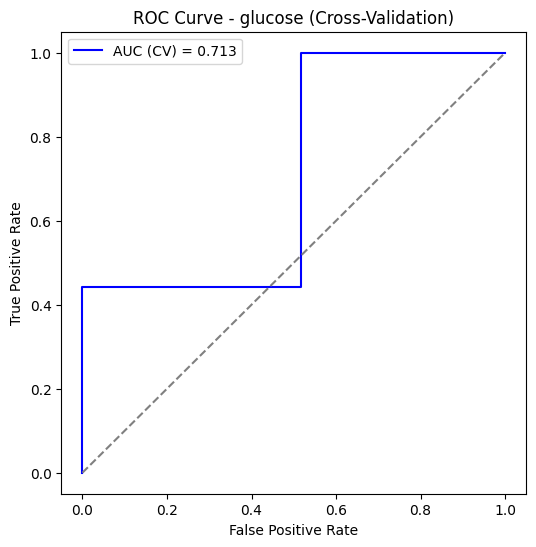

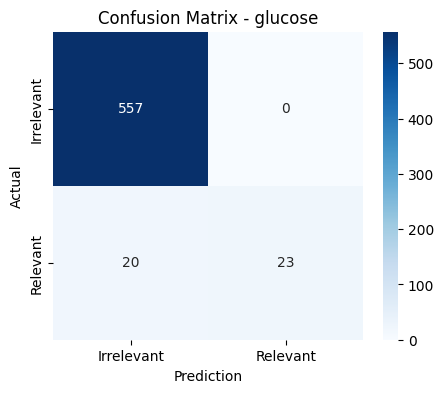

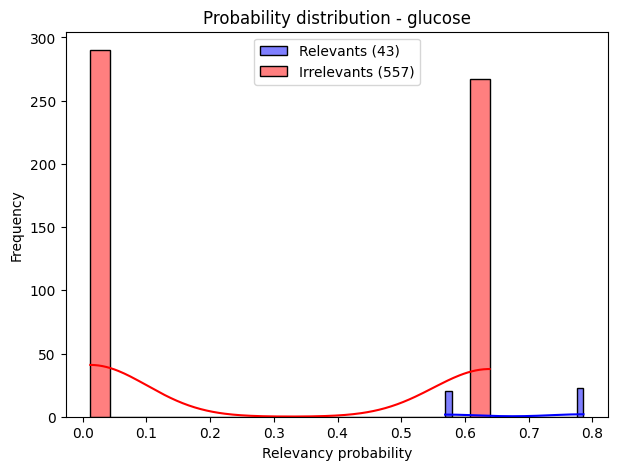

Processing bilirubin...
Results for bilirubin:
Accuracy: 0.9672
Precision: 0.9429
Recall: 1.0000
F1-score: 0.9706
AUC Cross-Validation Mean: 0.9928 ± 0.0120



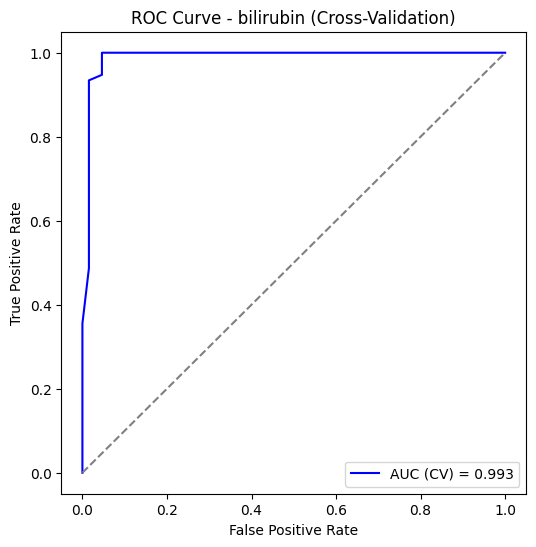

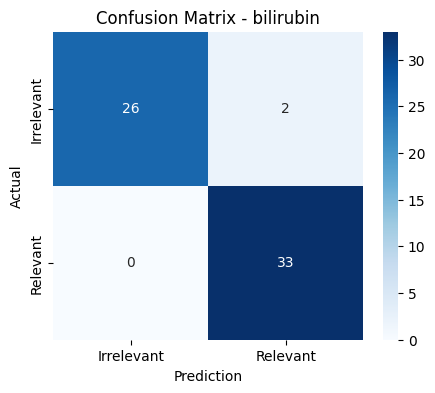

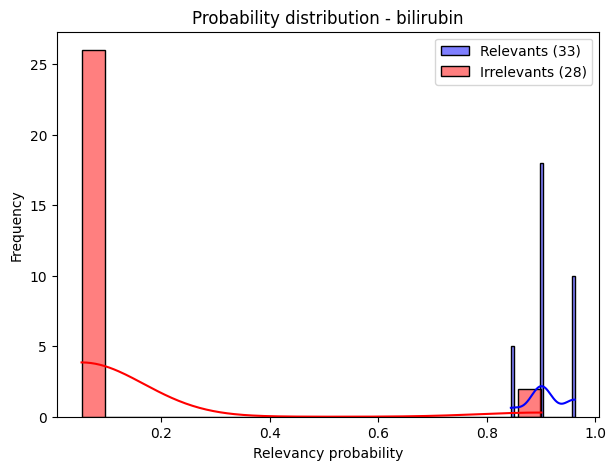

Processing white_blood...
Results for white_blood:
Accuracy: 0.9868
Precision: 0.9787
Recall: 0.9954
F1-score: 0.9870
AUC Cross-Validation Mean: 0.9920 ± 0.0029



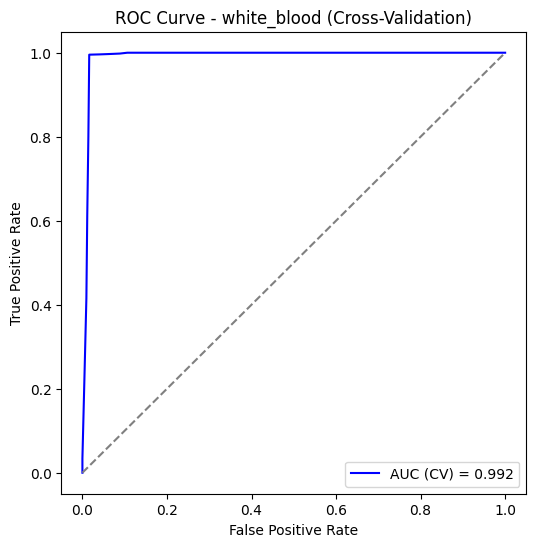

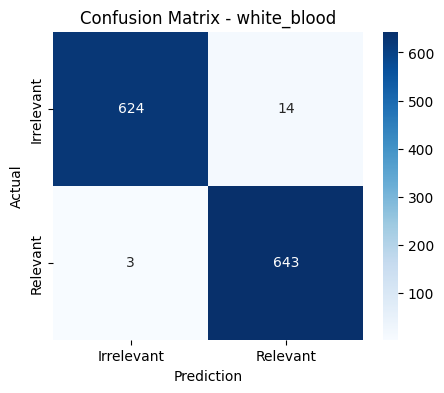

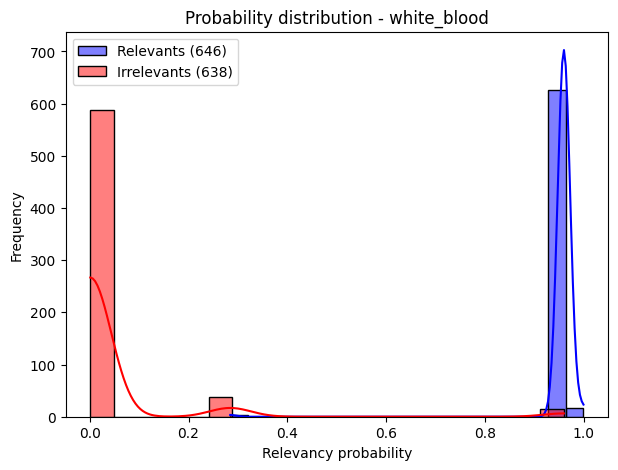

Processing insulin...
Results for insulin:
Accuracy: 0.9515
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
AUC Cross-Validation Mean: 0.9714 ± 0.0571



c:\Users\melli\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


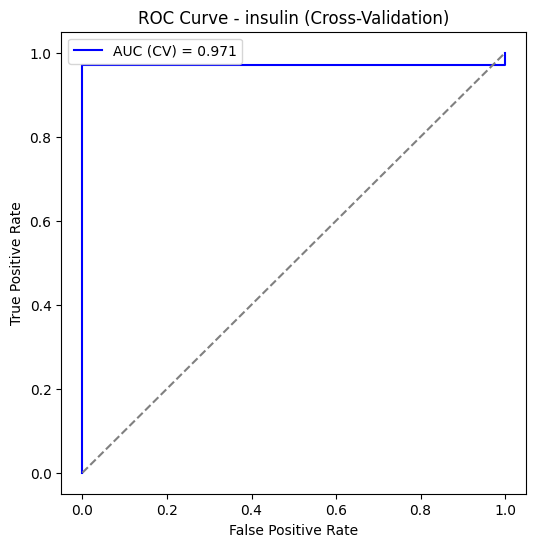

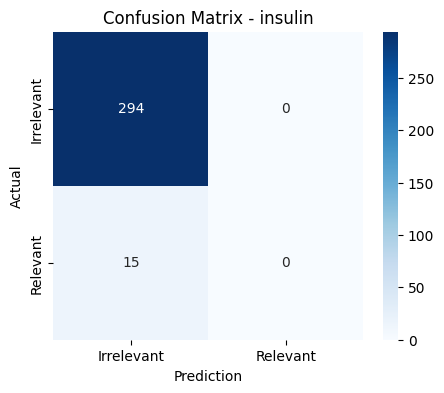

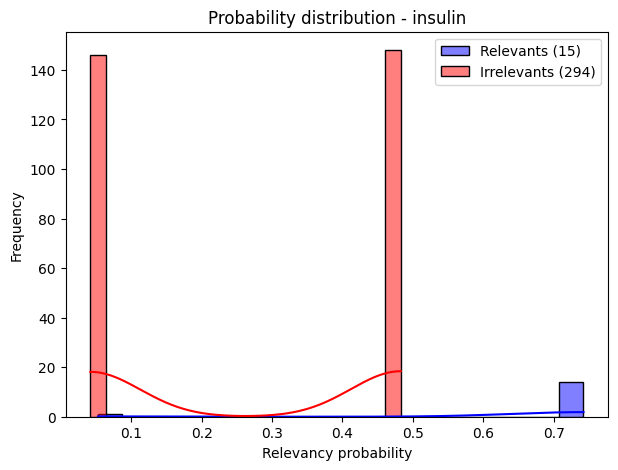

Processing cancer...
Results for cancer:
Accuracy: 0.8441
Precision: 0.1163
Recall: 0.4762
F1-score: 0.1869
AUC Cross-Validation Mean: 0.9159 ± 0.0129



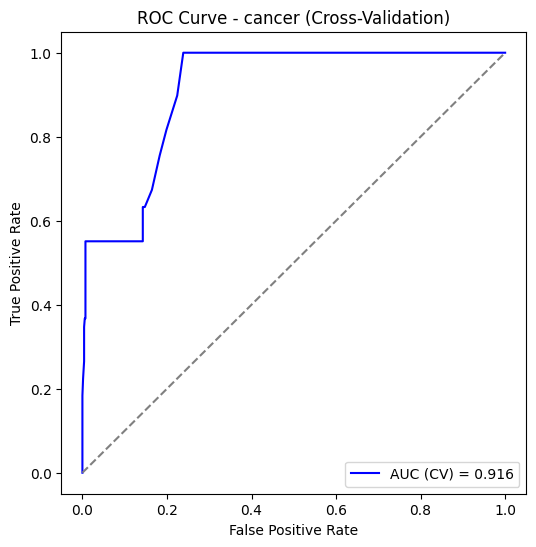

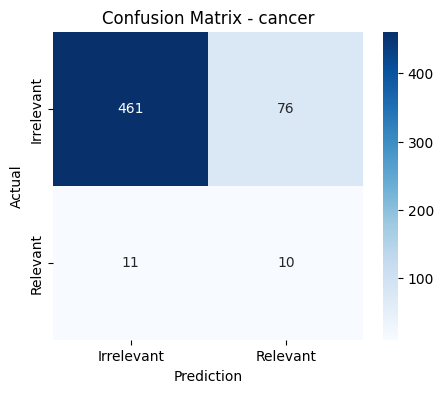

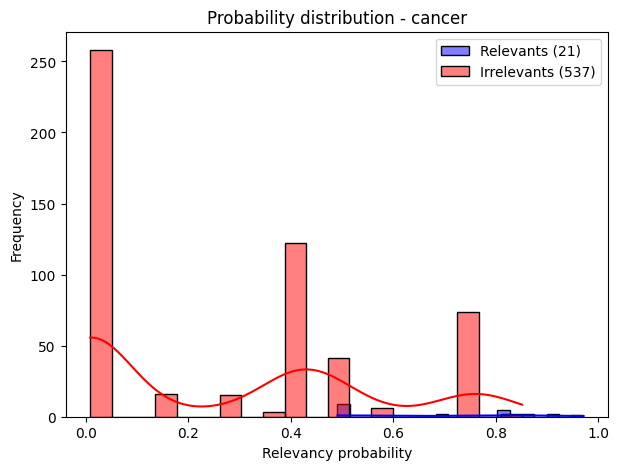

Processing mra...
Results for mra:
Accuracy: 0.9478
Precision: 0.4355
Recall: 0.4655
F1-score: 0.4500
AUC Cross-Validation Mean: 0.9869 ± 0.0032



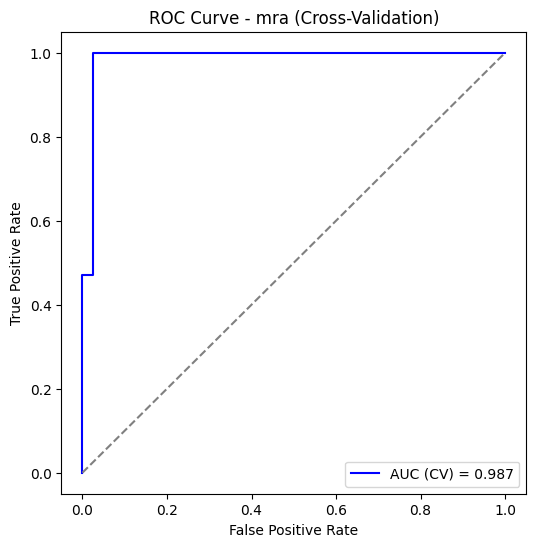

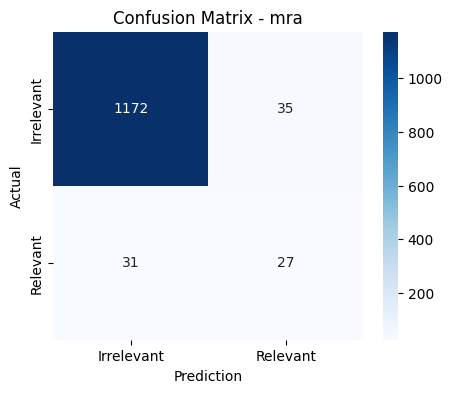

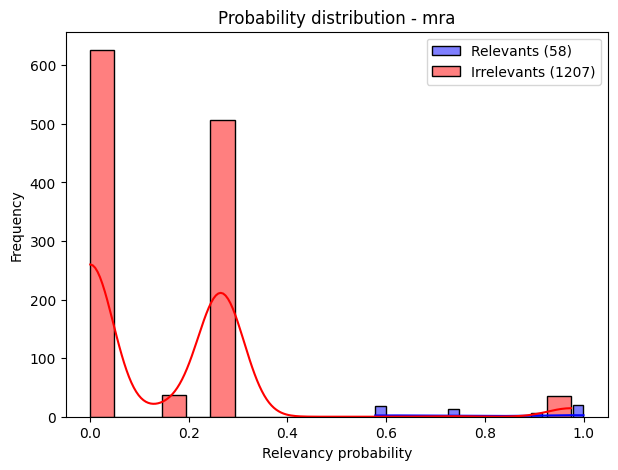

Processing cortisol...
Results for cortisol:
Accuracy: 0.8667
Precision: 0.9333
Recall: 0.8235
F1-score: 0.8750
AUC Cross-Validation Mean: 0.9557 ± 0.0284



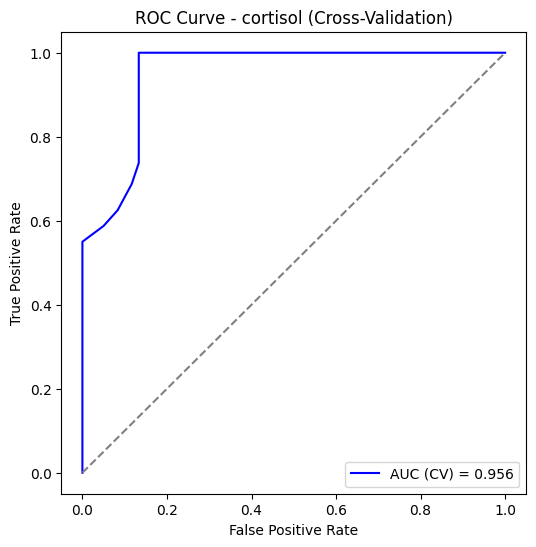

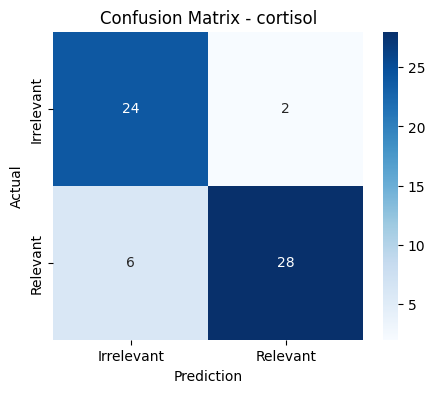

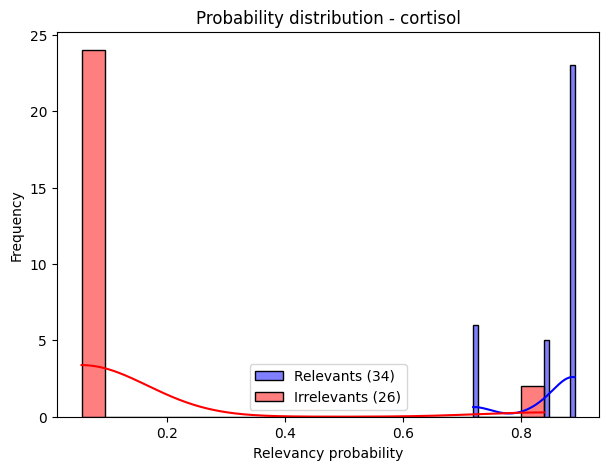

In [191]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

datasets_to_process = ["glucose", "bilirubin", "white_blood", "insulin","cancer","mra","cortisol"]

# Revisar tamaño de test
for dataset in datasets_to_process:
    print(f"{dataset}: {len(X_test[dataset])} muestras en test")

# Verificar dimensiones de white_blood
print(X_train["white_blood"].shape, y_train["white_blood"].shape)
print(X_test["white_blood"].shape, y_test["white_blood"].shape)

models = {}
metrics = {}

for dataset in datasets_to_process:
    print(f"Processing {dataset}...")

    # Limpiar datos
    X_train[dataset] = X_train[dataset].dropna()
    y_train[dataset] = y_train[dataset].loc[X_train[dataset].index]

    X_test[dataset] = X_test[dataset].dropna()
    y_test[dataset] = y_test[dataset].loc[X_test[dataset].index]

    # Modelo de Regresión Logística con class_weight="balanced"
    model = LogisticRegression(class_weight="balanced")

    # Validación cruzada: obtener probabilidades (cv=5)
    y_pred_proba_cv = cross_val_predict(model, X_train[dataset], y_train[dataset], cv=5, method="predict_proba")[:, 1]

    # Calcular AUC de validación cruzada
    auc_cv = cross_val_score(model, X_train[dataset], y_train[dataset], cv=5, scoring='roc_auc')

    # Ajustar modelo con todos los datos de entrenamiento
    model.fit(X_train[dataset], y_train[dataset])

    # Predicciones en el conjunto de test
    y_pred_proba = model.predict_proba(X_test[dataset])[:, 1]
    y_pred_binary = (y_pred_proba >= 0.75).astype(int)

    # Calcular métricas
    accuracy = accuracy_score(y_test[dataset], y_pred_binary)
    precision = precision_score(y_test[dataset], y_pred_binary)
    recall = recall_score(y_test[dataset], y_pred_binary)
    f1 = f1_score(y_test[dataset], y_pred_binary)

    models[dataset] = model
    metrics[dataset] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "AUC_CV_Mean": auc_cv.mean(),
        "AUC_CV_Std": auc_cv.std()
    }

    # Mostrar métricas
    print(f"Results for {dataset}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"AUC Cross-Validation Mean: {auc_cv.mean():.4f} ± {auc_cv.std():.4f}\n")

    #  Plot ROC Curve (Cross-validation)
    fpr, tpr, _ = roc_curve(y_train[dataset], y_pred_proba_cv)
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color='blue', label=f'AUC (CV) = {auc_cv.mean():.3f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {dataset} (Cross-Validation)")
    plt.legend()
    plt.show()

    # Plot Confusion Matrix
    cm = confusion_matrix(y_test[dataset], y_pred_binary)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Irrelevant", "Relevant"], yticklabels=["Irrelevant", "Relevant"])
    plt.xlabel("Prediction")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {dataset}")
    plt.show()

    num_relevants = sum(y_test[dataset] == 1)
    num_irrelevants = sum(y_test[dataset] == 0)

    # Plot Relevancy probability
    plt.figure(figsize=(7, 5))
    sns.histplot(y_pred_proba[y_test[dataset] == 1], color="blue", label=f"Relevants ({num_relevants})", bins=20, kde=True)
    sns.histplot(y_pred_proba[y_test[dataset] == 0], color="red", label=f"Irrelevants ({num_irrelevants})", bins=20, kde=True, alpha=0.5)
    plt.xlabel("Relevancy probability")
    plt.ylabel("Frequency")
    plt.title(f"Probability distribution - {dataset}")
    plt.legend()
    plt.show()
